# 2. Laboratorijske vježbe iz Numeričke matematike- zad 6

Ime i prezime: **Fran Ostroški**


Zadan je integral 
$$I(x)=\frac{1}{\sqrt{2\pi}}\int_0^x\exp(-\frac{t^2}{2})\, dt$$

a) Napišite program koji računa vrijednosti gornjeg integrala za odabrane točke x. Konkretno unutar intervala $[-1 ,\  1]$ odredite ekvidistantno raspoređene točke $x_i,\quad i=0,1,2,\ldots, k$, za primjerice $k=10$ te izračunajte vrijednosti funkcije $I(x_i)$ koristeći jednostavnu Simpsonovu formulu. Usporedite s vrijednostima koje se dobiju kompozitnom pravokutnom formulom za računanje istih integrala. Kod upotrebe kompozitne pravokutne formule upotrijebite broj točaka na intervalu na kojem računate integral tako da u procjeni pogreške dobijete pogrešku manju od $10^{-2}.$  Dobivene vrijednosti pospremite u vektor $I=(I_0,I_1,\ldots,I_n)$ posebno za jednostavnu Simpsonovu formulu, te posebno za kompozitnu pravokutnu formulu. Na temelju dobivenih podataka grafički prikažite funkciju $I(x)$ na intervalu $[-1,\  1]$, za slučaj jednostavne Simpsonove formule i za slučaj upotrebe kompozitne pravokutne formule.

-----------------------------------------------
Provjera zajedan fiksni k: 
 
Rezultat dobiven uporabom Simpsonove metode (k=10) je:  0.6826900317769404
Rezultat dobiven uporabom pravokutne metode (k=10) je:  0.6834979491869406
Za usporedbu, vrijednost np.trapz-a:  0.6806946736927374
 
Traženje potrebnog k za grešku manju od 10^-2...
 
Potreban k za grešku manju od 10^-2 je:  4
Dobiveni rezultat uz traženi k: 0.6878055489576537
-----------------------------------------------


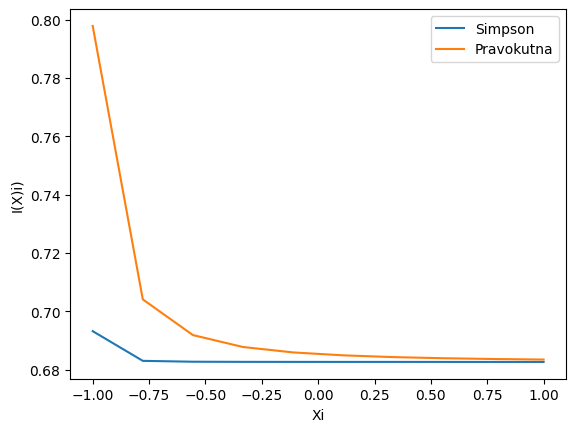

In [47]:
# Ovdje ide kod i graf

import numpy as np
import matplotlib.pyplot as plt

def Simpson(f,a,b,N):
    h =  (b-a)/N
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y[1:N] = 2*y[1:N]
    Sn = h*np.sum(y)/6
    x = np.linspace(a+h/2,b-h/2,N) # desni rub intervala
    y=f(x)
    Sn= Sn+2*h*np.sum(y)/3
    return Sn

def pravokutna(f,a,b,N):
    h =  (b-a)/N
    x = np.linspace(a+h/2,b-h/2,N) 
    y = f(x)
    h = (b - a)/N
    Mn = np.sum(h*y)
    return Mn

 # funkcije  iznad preuzete  su iz jupyter bilježnice "Numerička integracija.ipynb" iz 7. tjedna nastave
print("-----------------------------------------------")
print("Provjera zajedan fiksni k: ")
print(" ")
print("Rezultat dobiven uporabom Simpsonove metode (k=10) je: ", Simpson(lambda x: np.exp(-x**2 / 2) / np.sqrt(2*np.pi),-1,1,10))
print("Rezultat dobiven uporabom pravokutne metode (k=10) je: ", pravokutna(lambda x: np.exp(-x**2 / 2) / np.sqrt(2*np.pi),-1,1,10))
print("Za usporedbu, vrijednost np.trapz-a: ", np.trapz(np.exp(-np.linspace(-1,1,10)**2 / 2) / np.sqrt(2*np.pi), np.linspace(-1,1,10)))
print(" ")
print("Traženje potrebnog k za grešku manju od 10^-2...")
print(" ")

# rekurzivna funkcija za traženje potrebnog k za grešku manju od 10^-2

def pravokutna_rek(f, a, b, N, prev_result=None, eps=0.01):
    h = (b - a) / N
    x = np.linspace(a + h / 2, b - h / 2, N)
    y = f(x)
    Mn = np.sum(h * y)

    if prev_result is not None and abs(Mn - prev_result) < eps:
        print("Potreban k za grešku manju od 10^-2 je: ", N)
        return Mn

    return pravokutna_rek(f, a, b, N + 1, Mn)

print("Dobiveni rezultat uz traženi k: {}".format(pravokutna_rek(lambda x: np.exp(-x**2 / 2) / np.sqrt(2*np.pi),-1,1,1)))
print("-----------------------------------------------")

def calculate_integrals(f, a, b, N_start, N_end):
    N_values = list(range(N_start, N_end + 1))
    simpson_results = [Simpson(f, a, b, N) for N in N_values]
    pravokutna_results = [pravokutna(f, a, b, N) for N in N_values]
    return N_values, simpson_results, pravokutna_results

# Za k = 1 do 10
N_values, simpson_results, pravokutna_results = calculate_integrals(lambda x: np.exp(-x**2 / 2) / np.sqrt(2*np.pi), -1, 1, 1, 10)

# Plot the results
plt.plot(np.linspace(-1,1,10), simpson_results, label='Simpson')
plt.plot(np.linspace(-1,1,10), pravokutna_results, label='Pravokutna')
plt.xlabel('Xi')
plt.ylabel('I(X)i)')
plt.legend()
plt.show()

b) Koristeći metodu najmanjih kvadrata, podatke oblika (koje ste dobili kompozitnom pravokutnom formulom) $(x_i, I_i), i=0,1,\ldots n$ aproksimirajte polinomima stupnja $n=1, 2,3, 4$. (možete koristiti već ugrađene funkcije). Rezultate prikažite grafički (za prikaz grafova dobivenih polinoma upotrijebite više točaka, primjerice uzimete 100 točaka unutar intervala $[-1,1]$ u kojima ćete izvrijedniti aproksimacijske polinome.)

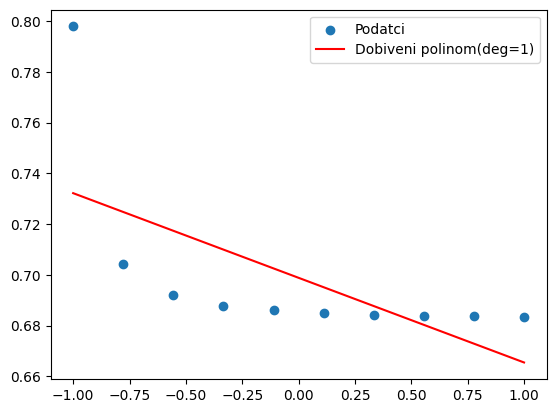

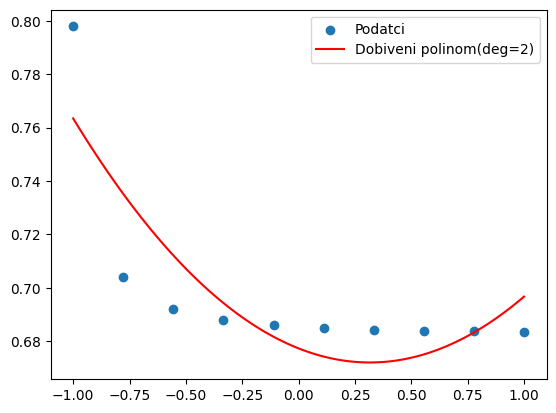

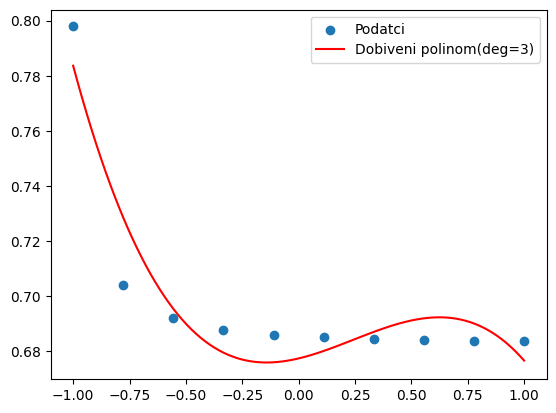

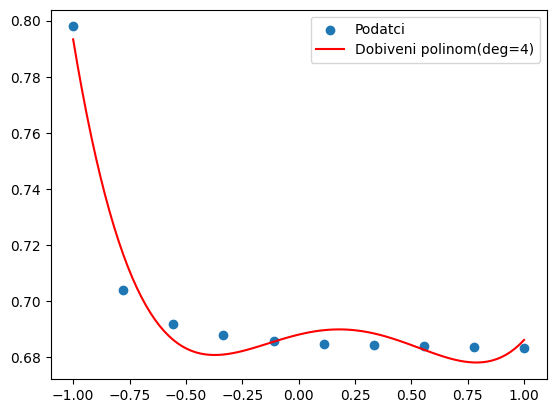

In [48]:
#Ovdje ide kod i  grafovi
#print(simpson_results)
#print(pravokutna_results)
y = pravokutna_results
x = np.linspace(-1,1,10)

xu = np.linspace(-1,1,100)
#print(x)
# modificirani vlastiti kod iz 2. laboratorijske vježbe - termin uživo
degrees = [1,2,3,4]

for deg in degrees:
    
    coefs  = np.polyfit(x,y,deg)
    y_fit = np.polyval(coefs, xu)

    plt.scatter(x, y, label='Podatci')
    plt.plot(xu, y_fit, label='Dobiveni polinom(deg={})'.format(deg), color='red')
    plt.legend()
    plt.show()
    #print(px)

c) Podatke $(x_i, I_i), i=0,1,\ldots 10$  interpolirajte kubnim splajnom (možete koristiti već ugrađene funkcije) te pomoću takve interpolacije izračunajte vrijednost $I(\frac{3}{7})$. Usporedite sa vrijednošću koju dobijete kada računate $$I(x)=\frac{1}{\sqrt{2\pi}}\int_0^\frac{3}{7}\exp(-\frac{t^2}{2})\, dt$$
jednostavnom Simpsonovom formulom.

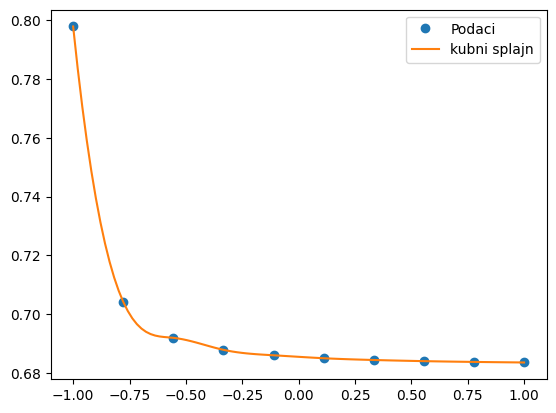

In [38]:
# ovdje sada ide kod i ispis
from scipy.interpolate import interp1d

y_cubic   = interp1d(x, y, kind='cubic')

plt.plot(x, y, 'o', label='Podaci')
plt.plot(xu, y_cubic(xu), label='kubni splajn')
plt.legend()
plt.show()



In [49]:
I_simpson = Simpson(lambda x: np.exp(-x**2 / 2) / np.sqrt(2*np.pi), 0, 3/7, 10)
print("I(3/7) pomoću Simpsonove formule:", I_simpson)
print("I(3/7) pomoću interpolacije:",y_cubic(3/7))


I(3/7) pomoću Simpsonove formule: 0.16588242961706298
I(3/7) pomoću interpolacije: 0.6841610696398811


d) Napišite kratak zaključak

Iz a) dijela zadatka možemo zaključiti kako je simpsonova formula bolja od kvadratne, u smislu preciznije određuje vrijednost čak i za male k, dok kako povećavamo k ta razlika postaje sve manja i manja.

U b) dijelu vidimo da polinomi niskih stupnjeva aproksirimiraju uz dosta "velike" greške (u usporedbi s kubnim splajnom, koji prolazi kroz točke jer interpolira), ali se greške smanjuju kako raste stupanj (ali ćemo vjerojatno svejedno imati probleme na rubovima intervalima). U oba slučaja se apsolutna pogreška smanjuje (teži prema nuli), ali za splajn se to događa puno brže.

Što se tiče c) dijela, uporabom Simpsonove formule  za 3/7 dobivamo rezultat koji značajno odstupa od vrijednosti dobivene interpolacijom kubnim splajnom.